In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as ps 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data={'Games':['Smackdown pain','GTA vice city','GTA San Andreas','Mortal kombat','God of War'],'Ratings':[10,9,8,10,10],'Downloads':[10008484584,10008448854,80084484,1000858,50084845]}

In [4]:
P= ps.DataFrame(data,columns=["Games","Ratings","Downloads"])

In [5]:
P

,Games,Ratings,Downloads
0,Smackdown pain,10,10008484584
1,GTA vice city,9,10008448854
2,GTA San Andreas,8,80084484
3,Mortal kombat,10,1000858
4,God of War,10,50084845


In [6]:
p= ps.DataFrame(np.random.randint(200,1000,size=(40,5)),columns=list('abcde'))

In [7]:
normalization_df= ps.DataFrame({'x':np.random.randint(-100,100,1000),
                               'y':np.random.randint(-80,80,1000),
                               'z':np.random.randint(-150,150,1000),})

In [8]:
normalization_df

,x,y,z
0,55,32,-90
1,-77,-72,117
2,-22,-20,-141
3,-24,-31,-113
4,-47,38,79
...,...,...,...
995,98,4,94
996,44,-30,70
997,13,-58,-76
998,47,-29,-105


<Figure size 640x480 with 0 Axes>

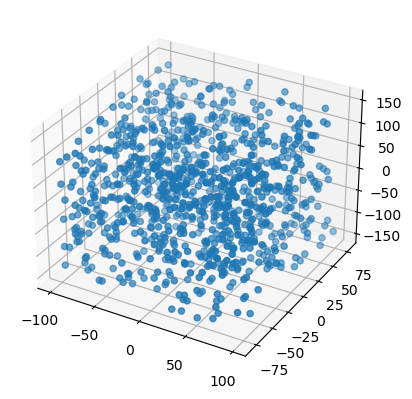

<Figure size 640x480 with 0 Axes>

In [9]:
ax= plt.axes(projection='3d')
ax.scatter3D(normalization_df.x,normalization_df.y,normalization_df.z)
plt.figure() #unnormalizied data

In [10]:
#gonna normalize

In [11]:
pip install sklearn3

Note: you may need to restart the kernel to use updated packages.


In [12]:
import sklearn3 as sk

In [13]:
from sklearn.preprocessing import Normalizer

In [14]:
normal= Normalizer()

In [15]:
normalization_df=normal.fit_transform(normalization_df)

In [16]:
normalization_df

array([[ 0.49899067,  0.29032184, -0.81653018],
       [-0.48893077, -0.45718202,  0.74292079],
       [-0.15267106, -0.13879187, -0.97848269],
       ...,
       [ 0.13473854, -0.60114118, -0.78770223],
       [ 0.39616277, -0.24444086, -0.88504448],
       [ 0.27086066,  0.55461944,  0.78678572]])

In [17]:
norm_df= ps.DataFrame(normalization_df,columns=['x1','x2','x3'])

In [18]:
norm_df

,x1,x2,x3
0,0.498991,0.290322,-0.816530
1,-0.488931,-0.457182,0.742921
2,-0.152671,-0.138792,-0.978483
3,-0.200656,-0.259181,-0.944755
4,-0.472511,0.382030,0.794221
...,...,...,...
995,0.721369,0.029444,0.691925
996,0.500258,-0.341085,0.795866
997,0.134739,-0.601141,-0.787702
998,0.396163,-0.244441,-0.885044


<Figure size 640x480 with 0 Axes>

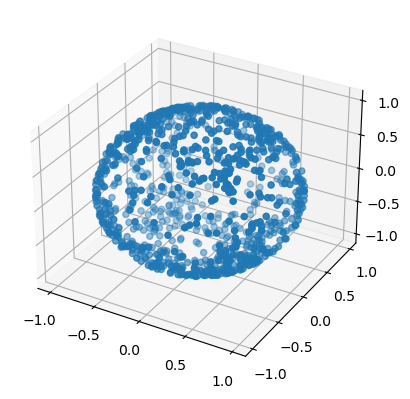

<Figure size 640x480 with 0 Axes>

In [19]:
ax= plt.axes(projection='3d')
ax.scatter3D(norm_df.x1,norm_df.x2,norm_df.x3)
plt.figure() #normalizied data

In [20]:
#MISSING VALUES


In [21]:
data= {'First score':[100,99,np.nan,98],
       'Second score':[70,np.nan,89,90],
       'Third score':[np.nan,78,98,78],
       'Fourth score':[67,68,69,np.nan]}
scores = ps.DataFrame(data)


In [22]:
scores #NaN - data not available

,First score,Second score,Third score,Fourth score
0,100.0,70.0,NaN,67.0
1,99.0,NaN,78.0,68.0
2,NaN,89.0,98.0,69.0
3,98.0,90.0,78.0,NaN


In [23]:
scores.isnull()

,First score,Second score,Third score,Fourth score
0,False,False,True,False
1,False,True,False,False
2,True,False,False,False
3,False,False,False,True


In [24]:
scores.isnull().sum()

First score     1
Second score    1
Third score     1
Fourth score    1
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer= SimpleImputer(missing_values= np.nan,strategy='mean') 
#most_frequent(for mode), median can be written instead of mean in strategy

In [27]:
imputer.fit(scores)

SimpleImputer()

In [28]:
imputer.transform(scores)

array([[100.        ,  70.        ,  84.66666667,  67.        ],
       [ 99.        ,  83.        ,  78.        ,  68.        ],
       [ 99.        ,  89.        ,  98.        ,  69.        ],
       [ 98.        ,  90.        ,  78.        ,  68.        ]])